In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
batch_num = 0

/Users/davidfoster/.virtualenvs/worldmodels/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
obs_data = np.load('./data/obs_data_car_racing_' + str(batch_num) + '.npy') 
action_data = np.load('./data/action_data_car_racing_' + str(batch_num) + '.npy')
reward_data = np.load('./data/reward_data_car_racing_' + str(batch_num) + '.npy') 
done_data = np.load('./data/done_data_car_racing_' + str(batch_num) + '.npy')
rnn_input = np.load('./data/rnn_input_' + str(batch_num) + '.npy') 
rnn_output = np.load('./data/rnn_output_' + str(batch_num) + '.npy')

In [6]:
rnn_input[0].shape

(299, 35)

In [5]:
rnn_output[0].shape

(299, 34)

[-1.06637168  0.55237836 -0.77303022 -1.35024321 -1.33096671  2.29935145
  1.9541254  -0.34418598 -0.41820639 -1.32322073  1.32427764  0.06426671
 -0.85129845  0.75131595  0.464654   -1.11032856 -0.85838354 -0.15098119
 -0.33474261  2.34970808 -0.46500921  0.1909574  -0.5778172   0.2605972
 -0.81331009  0.7373994   2.11216283  1.01900291  0.06760466  0.29801828
 -0.17398369  1.67492437  0.          1.          0.        ]


<function matplotlib.pyplot.show>

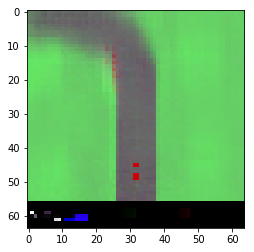

In [11]:
idx = 50
obs = rnn_input[0][idx]
print(obs)
z_decoded = vae.decoder.predict(np.array([obs[:32]]))[0]
plt.imshow(z_decoded)
plt.show